## Data Understanding ## 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#import dataset

df = pd.read_csv('./test_dataset.csv',parse_dates=[3,17,18], dayfirst=True)

### **1. What are the features available in the dataset?** ###

In [3]:
df.shape

(142608, 27)

In [4]:
print(df.columns.values)

['Unnamed: 0' 'channel' 'cnt' 'date_time' 'hotel_cluster'
 'hotel_continent' 'hotel_country' 'hotel_market' 'is_booking' 'is_mobile'
 'is_package' 'month' 'orig_destination_distance' 'posa_continent'
 'site_name' 'srch_adults_cnt' 'srch_children_cnt' 'srch_ci' 'srch_co'
 'srch_destination_id' 'srch_destination_type_id' 'srch_rm_cnt' 'user_id'
 'user_location_city' 'user_location_country' 'user_location_region'
 'year']


In [5]:
df.head()

,Unnamed: 0,channel,cnt,date_time,hotel_cluster,hotel_continent,hotel_country,hotel_market,is_booking,is_mobile,...,srch_ci,srch_co,srch_destination_id,srch_destination_type_id,srch_rm_cnt,user_id,user_location_city,user_location_country,user_location_region,year
0,29,9,1,2013-09-27 17:36:00,68,6,68,275,1,0,...,2014-05-01,2014-05-04,8213,1,2,4539,19639,46,171,2013
1,30,5,1,2013-09-27 17:36:00,68,6,68,275,1,0,...,2014-05-01,2014-05-04,8213,1,1,4539,19639,46,171,2013
2,34,9,1,2013-11-17 08:32:00,82,6,107,186,1,0,...,2013-11-30,2013-12-01,8813,1,1,4539,43387,46,171,2013
3,40,9,2,2013-11-20 12:03:00,1,2,50,628,1,0,...,2014-07-31,2014-08-02,8250,1,1,4539,15334,46,171,2013
4,42,9,2,2013-11-21 11:15:00,91,2,50,1230,1,0,...,2014-08-19,2014-08-22,8279,1,1,4539,19639,46,171,2013


### **2. Which features are categorical?** ###

**Categorical:**
    'channel',
    'cnt',
    'hotel_cluster',
    'hotel_continent',
    'hotel_country',
    'hotel_market',
    'is_booking',
    'is_mobile',
    'is_package',
    'month',
    'posa_continent',
    'site_name',
    'srch_destination_id',
    'srch_destination_type_id',
    'user_id',
    'user_location_city',
    'user_location_country',
    'user_location_region',
    'year'

### **3. Which features are numerical?** ###

**Timeseries related:** 'date_time','srch_ci','srch_co' 
**Continuous:** 'orig_destination_distance', **Discrete:** 'srch_adults_cnt','srch_children_cnt','srch_rm_cnt'

The first column which has no label is an unique id. It can be removed since it is not useful for analytics purposes.

In [6]:
#test if the values on first column are all unique
df.iloc[:,0].is_unique

True

### **4. What are the data types for various features?** ###

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142608 entries, 0 to 142607
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 142608 non-null  int64         
 1   channel                    142608 non-null  int64         
 2   cnt                        142608 non-null  int64         
 3   date_time                  142608 non-null  datetime64[ns]
 4   hotel_cluster              142608 non-null  int64         
 5   hotel_continent            142608 non-null  int64         
 6   hotel_country              142608 non-null  int64         
 7   hotel_market               142608 non-null  int64         
 8   is_booking                 142608 non-null  int64         
 9   is_mobile                  142608 non-null  int64         
 10  is_package                 142608 non-null  int64         
 11  month                      142608 non-null  int64   

### **5. Which features contain blank, null or empty values?** ###

Looking at df.info() we can see that 'orig_destination_distance' contains 92946 non null values of a total 142608 rows, so it cleary has NA or missing values.

### **6. How are the numerical features distributed?** ###

In [8]:
df[['cnt','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','orig_destination_distance',]].describe()

,cnt,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,orig_destination_distance
count,142608.000000,142608.000000,142608.000000,142608.000000,92946.000000
mean,1.016472,1.801168,0.272383,1.134635,1665.357641
std,0.146300,0.905180,0.611742,0.489406,2164.036305
min,1.000000,0.000000,0.000000,0.000000,0.005600
25%,1.000000,1.000000,0.000000,1.000000,211.053025
50%,1.000000,2.000000,0.000000,1.000000,793.243000
75%,1.000000,2.000000,0.000000,1.000000,2166.322250
max,10.000000,9.000000,9.000000,8.000000,11937.940200


**cnt:** at first we can imagine that cnt is the total number of people (adults and children) in the search/booking however a quick test shows this assumption is not true.

Plotting a histogram for this feature shows that almost all records have value 1.

Moreover, there a few outlier values as can be see below in the boxplot visualization.

Having that said we may drop this feature.

In [9]:
df['cnt'] == df['srch_adults_cnt'] + df['srch_children_cnt']

0         False
1         False
2         False
3         False
4         False
          ...  
142603     True
142604     True
142605    False
142606    False
142607     True
Length: 142608, dtype: bool

<AxesSubplot:>

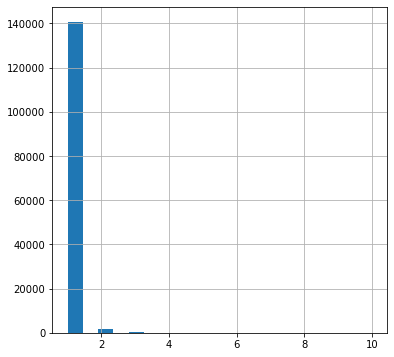

In [10]:
df['cnt'].hist(figsize=(6,6), bins = 20)

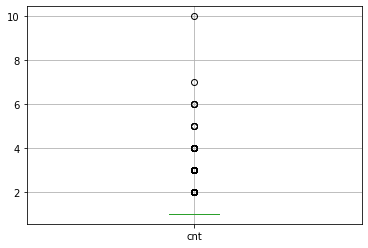

In [11]:
df.boxplot(column='cnt');

**srch_rm_cnt**: this feature also has an unequal distribution, however assuming it stands for the number of rooms in the search/booking it is reasonable that almost all users would look for 1 room only.

There are some outliers (7 records) where the room counter is 0 and other 99 records where room counter is 8.

For the case of 0 rooms, at first it may seem unexpected to have a booking without a room, but it may be a case where an user can book a luggage storage locker or something similar.

As for the outliers with  9 rooms, we decide to keep it since although it can impact some results of the analysis, it is still an reasonable event. 

Moreover, for an exponential distribution, the mean is not a good statistical measure to represent the feature, whereas the mode give us a much better insight about the population.

For modeling purpose this feature might have to be normalized.

<AxesSubplot:>

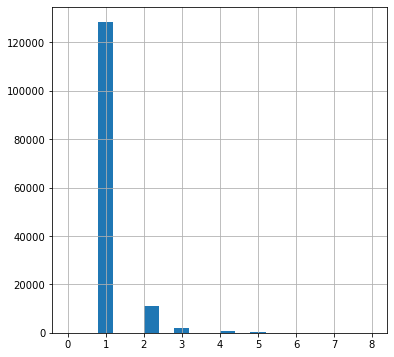

In [12]:
df['srch_rm_cnt'].hist(figsize=(6,6), bins = 20)

**srch_adults_cnt** and **srch_children_cnt**: the distribution follows a similar pattern where most records of bookings are for 1 or 2 adults and 0 children, with that maybe being an indicative of the demographics of those users.

There are 259 records where there are 0 children and 0 adults associated with the search/booking, which seems odd at first. However, it is reasonable to have cases where rooms are booked in advance without indication of the number of people.

<AxesSubplot:>

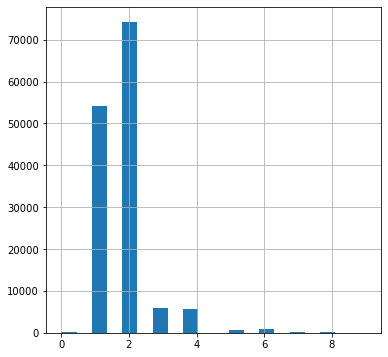

In [13]:
df['srch_adults_cnt'].hist(figsize=(6,6), bins = 20)

<AxesSubplot:>

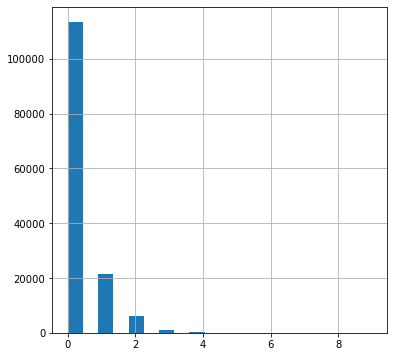

In [14]:
df['srch_children_cnt'].hist(figsize=(6,6), bins = 20)

In [15]:
len(df[(df['srch_adults_cnt'] == 0) & (df['srch_children_cnt'] == 0)])

259

**orig_destination_distance:**
The distribution for this feature is reasonable, as most people travel to closer destinations since it is usually cheaper and easier.

There are 49662 rows containg null values. It may have to be replaced since the number of rows that would be dropped is considerably high and since it can be correlated with location features to explain why a given user prefers one hotel over another. 

A simple solution could be to replace the null values by the average value, but we can risky damaging the consistency of the dataset, so it has to be evaluated if it is feasible or not.

In [16]:
len(df[df['orig_destination_distance'].isnull()])

49662

<AxesSubplot:>

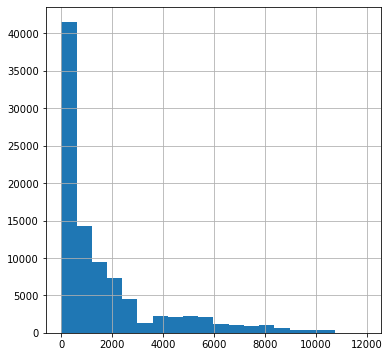

In [17]:
df['orig_destination_distance'].hist(figsize=(6,6), bins = 20)

In [18]:
df[['date_time','srch_ci','srch_co']].describe(datetime_is_numeric=True)

,date_time,srch_ci,srch_co
count,142608,142608,142608
mean,2013-10-27 07:07:15.204068608,2013-11-27 21:30:29.687032064,2013-11-30 06:53:11.652701696
min,2013-09-01 00:11:00,2013-09-01 00:00:00,2013-09-02 00:00:00
25%,2013-09-27 07:14:15,2013-10-16 00:00:00,2013-10-18 00:00:00
50%,2013-10-24 18:26:00,2013-11-19 00:00:00,2013-11-22 00:00:00
75%,2013-11-25 11:13:00,2013-12-25 00:00:00,2013-12-28 00:00:00
max,2013-12-31 23:59:00,2015-03-27 00:00:00,2015-03-30 00:00:00


**date_time:** all records are between january and december of 2013. It seems safe to assume that this feature stands for the date of the search in the booking platform.

**date_time** and **srch_co**: we assume that srch_ci indicates the date of check in and srch_co the date of checkout on the booking platform. It goest from September 2013 to March 2015.

It can be used to generate an aditional feature to represent the number of nights for each reservation.

In [19]:
len(df[df['srch_ci'] > df['srch_co']])

#we can safely assume that srch_ci meands the date of check in and srch_co the date of checkout

0

In [20]:
len(df[df['srch_ci'] == df['srch_co']])

0

**7. How are the categorical features distibuted?**

In [21]:
df[['hotel_cluster','hotel_continent','hotel_country','hotel_market','posa_continent','channel',
 'site_name','srch_destination_id','srch_destination_type_id','user_id','user_location_city','user_location_country','user_location_region'
 ,'month','year']].astype('object').describe()

,hotel_cluster,hotel_continent,hotel_country,hotel_market,posa_continent,channel,site_name,srch_destination_id,srch_destination_type_id,user_id,user_location_city,user_location_country,user_location_region,month,year
count,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608,142608
unique,100,7,184,1920,5,11,34,11159,6,70189,10872,198,770,4,1
top,91,2,50,628,3,9,2,8250,1,191631,5703,66,174,9,2013
freq,5842,86210,75425,6571,112427,92320,91136,4856,74354,52,2624,74712,14985,40283,142608


In [22]:
df['month'] == pd.DatetimeIndex(df['date_time']).month

#we can assume that year and month are based on the datetime feature

0         True
1         True
2         True
3         True
4         True
          ... 
142603    True
142604    True
142605    True
142606    True
142607    True
Length: 142608, dtype: bool

In [23]:
df[['is_booking','is_mobile','is_package']].describe()

#these flags are essentially categorical features but are better analyzed as numerical 

,is_booking,is_mobile,is_package
count,142608.0,142608.000000,142608.000000
mean,1.0,0.092014,0.128492
std,0.0,0.289047,0.334638
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.000000,0.000000
max,1.0,1.000000,1.000000


Hereunder we try to group and understand the categorical features in a way that makes sense regarding the context of a hotel booking platform:

First, we group the features that point to the hotels attributes:

- **hotel_cluster:** 100 hotel clusters. It seems to be some sort of groupping based on user's preferences or location
- **hotel_continent:** 7 hotel continents
- **hotel_country:** 184 hotel countries
- **hotel_market:** 1920 hotel markets

Next, the following attributes seems related with the marketing channels:
- **channel:** 11 channels. It may be the marketing channel through which the user accessed or got to know the platform
- **posa_continents:** 5 continents, but it is not clear what this feature refers to, possibly related to the sites location
- **site_name**: 34 site names. We assume it indicates the local website address of the platform

Then, there are some features regarding the destinations:

- **srch_destination_id:** 11159 destinations
- **srch_destination_type_id:** 6 types of destinations

Users attributes are easily identifiable:

- **user_id:** 70189 users
- **user_location_city:** 10872 cities. We assume this and other users' location features indicates where the user lives
- **user_location_region:** 770 user's location's regions
- **user_location_country:** 198 user's countries

There are categorical features related to timeseries which are extracts from 'date_time':
- **month**: 4 months
- **year**: 1 year

And finally features related with the search in the plaform, which give us some insights about the data:
- **is_booking:** 100% of records are booking events
- **is_mobile:** around 9% of booking events are from mobile devices
- **is_package:** around 13% of booking events are part of travel packages

### **8. Assumptions about the dataset** ###

**Cleaning**

- The first feature which does not have a label is an unique id for each row. It was dropped from the dataset since it has no usage in an analytics solution and the unique row index can be used instead to identify each row.
- **cnt**: looking at the distribution we see that almost 99% of the records have value 1 with the rest 1% containg outliers. Although replacing the outliers with 1 could be a strategy to be applied, it would leave us with a feature without a clear meaning where all the values are the same. With that in mind, it makes sense to drop this feature.
- **month** and **year**: date_time can be used instead of those features, so they can be removed given the redundancy
- **is_booking**: since the all the records are booking events we can assume this feature does not have any usage. In a different context we would keep it in order to compare booking and non-booking events, but for the sake of simplicity of this solution we can remove it.

**Adding features**

- A feature **duration_stay** can be added to indicate the number of nights on each booking
- Another feature **months_adv** can be added to indicate with how many months in advance the users book hotels

**Missing values**

- **orig_destination_distance**: in order to proceed with the analysis we will replace the null values by the mean value of the feature and evaluate the impact before proceeding


**Correlating**

- In order to move on with the analysis we want to do some assumptions regarding the correlation between the features
- To test these assumptions and find the correlations we need to ask some questions to guide the analysis. To propose these questions we want first to consider what would be the target for a booking platform and that would be the insights the could generate more results. With this in mind and based on the data available we propose to focus on three key themes:
    1. How is the popularity of the platform by location features and overtime (measured by number of bookings)?
    4. When do users travel?
    3. How long in advance users book their stays? How does it correlate with other features?
    2. How is the performance of the different sites? 
    
- Besides those key themes we are also going to explore the insights that might come up along the exploration analysis.

## Data Preparation ##

### Cleaning, completing and adding features ###

In [24]:
# drop 'cnt','month','year'
df.drop(['cnt','month','year','is_booking'], axis='columns', inplace=True)

# drop first column
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [25]:
#create feature for duration of stay
df['days_stay'] = df.srch_co - df.srch_ci

df['days_stay'] = df['days_stay'].dt.days

In [26]:
#create feature for how many days in advance the booking was done
df['days_in_adv'] = df.srch_ci.values.astype('datetime64[D]') - df.date_time.values.astype('datetime64[D]')

df['days_in_adv'] = df['days_in_adv'].dt.days

In [27]:
#rearrange columns for better readability and grouping closely related features
df.columns.values

array(['channel', 'date_time', 'hotel_cluster', 'hotel_continent',
       'hotel_country', 'hotel_market', 'is_mobile', 'is_package',
       'orig_destination_distance', 'posa_continent', 'site_name',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_ci', 'srch_co',
       'srch_destination_id', 'srch_destination_type_id', 'srch_rm_cnt',
       'user_id', 'user_location_city', 'user_location_country',
       'user_location_region', 'days_stay', 'days_in_adv'], dtype=object)

In [28]:
df = df[['date_time', 
         'hotel_cluster', 'hotel_continent', 'hotel_country','hotel_market', 
         'is_mobile', 'is_package','orig_destination_distance', 
         'channel','posa_continent', 'site_name',
         'srch_adults_cnt', 'srch_children_cnt','srch_destination_id', 'srch_destination_type_id', 'srch_rm_cnt','srch_ci', 'srch_co','days_stay', 'days_in_adv', 
         'user_id', 'user_location_city', 'user_location_country','user_location_region']]

<AxesSubplot:>

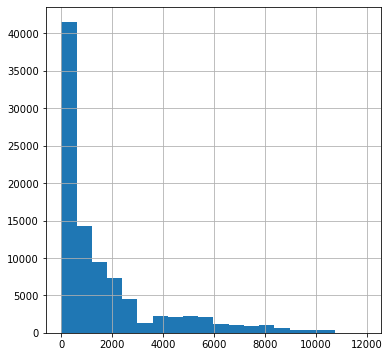

In [29]:
#First we try to replace the missing valeus by the average and see the impact on the distribution

#Histogram before replacing the NA values:

df['orig_destination_distance'].hist(figsize=(6,6), bins = 20)

<AxesSubplot:>

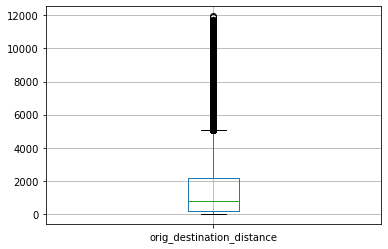

In [30]:
#Histogram after replacing the NA value:

df.boxplot(column='orig_destination_distance')

<AxesSubplot:>

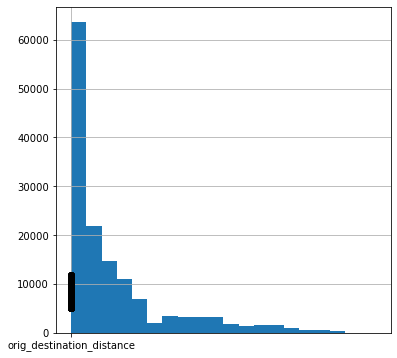

In [31]:
#fill NA values with values from a distribution based on the distribution of existing non null values

isnull = df['orig_destination_distance'].isnull() #find nulls
sample = df['orig_destination_distance'].dropna().sample(n=isnull.sum(), replace=True).values #sample from non-nulls the amount of nulls
df.loc[isnull, 'orig_destination_distance'] = sample #replace null values with values from the sample

df['orig_destination_distance'].hist(figsize=(6,6), bins = 20)

df.boxplot(column='orig_destination_distance')

<AxesSubplot:>

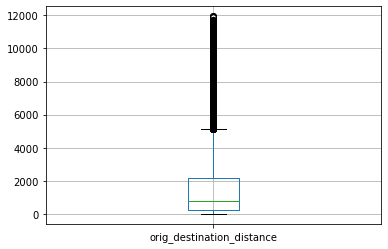

In [32]:
df.boxplot(column='orig_destination_distance')

In [33]:
#export cleaned data frame to a csv file for the next step of the analysis

df.to_csv("clean_data.csv",index=False)